In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.gridspec as gs
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from eda_module import *

%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('churn_data.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#Print number of rows in DF
print(f"Rows: {df.shape[0]}")
print("----------------------")
#Print number of features in DF
print(f"Features: {df.shape[1]}")
print("----------------------")
#Print total number of missing values
print(f"Missing Values: {df.isnull().values.sum()}")
print("----------------------")
#Print number of unique values per feature location
print(f"Unique Values: {df.nunique()} \n")

Rows: 7043
----------------------
Features: 21
----------------------
Missing Values: 0
----------------------
Unique Values: customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64 



In [5]:
# make all column names lowercase
df.columns = map(str.lower, df.columns)
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [6]:
# Replace all missing string values with 0
df.totalcharges = df.totalcharges.replace(" ", 0)
# Change totalcharges type from string to float
df.totalcharges = df.totalcharges.astype('float32')

In [7]:
#to study about numberical data
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734375
std,0.368612,24.559481,30.090047,2266.794434
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.549988
50%,0.000000,29.000000,70.350000,1394.550049
75%,0.000000,55.000000,89.850000,3786.599976
max,1.000000,72.000000,118.750000,8684.799805


#**EDA**

In [8]:
#Count The value of target variable 
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

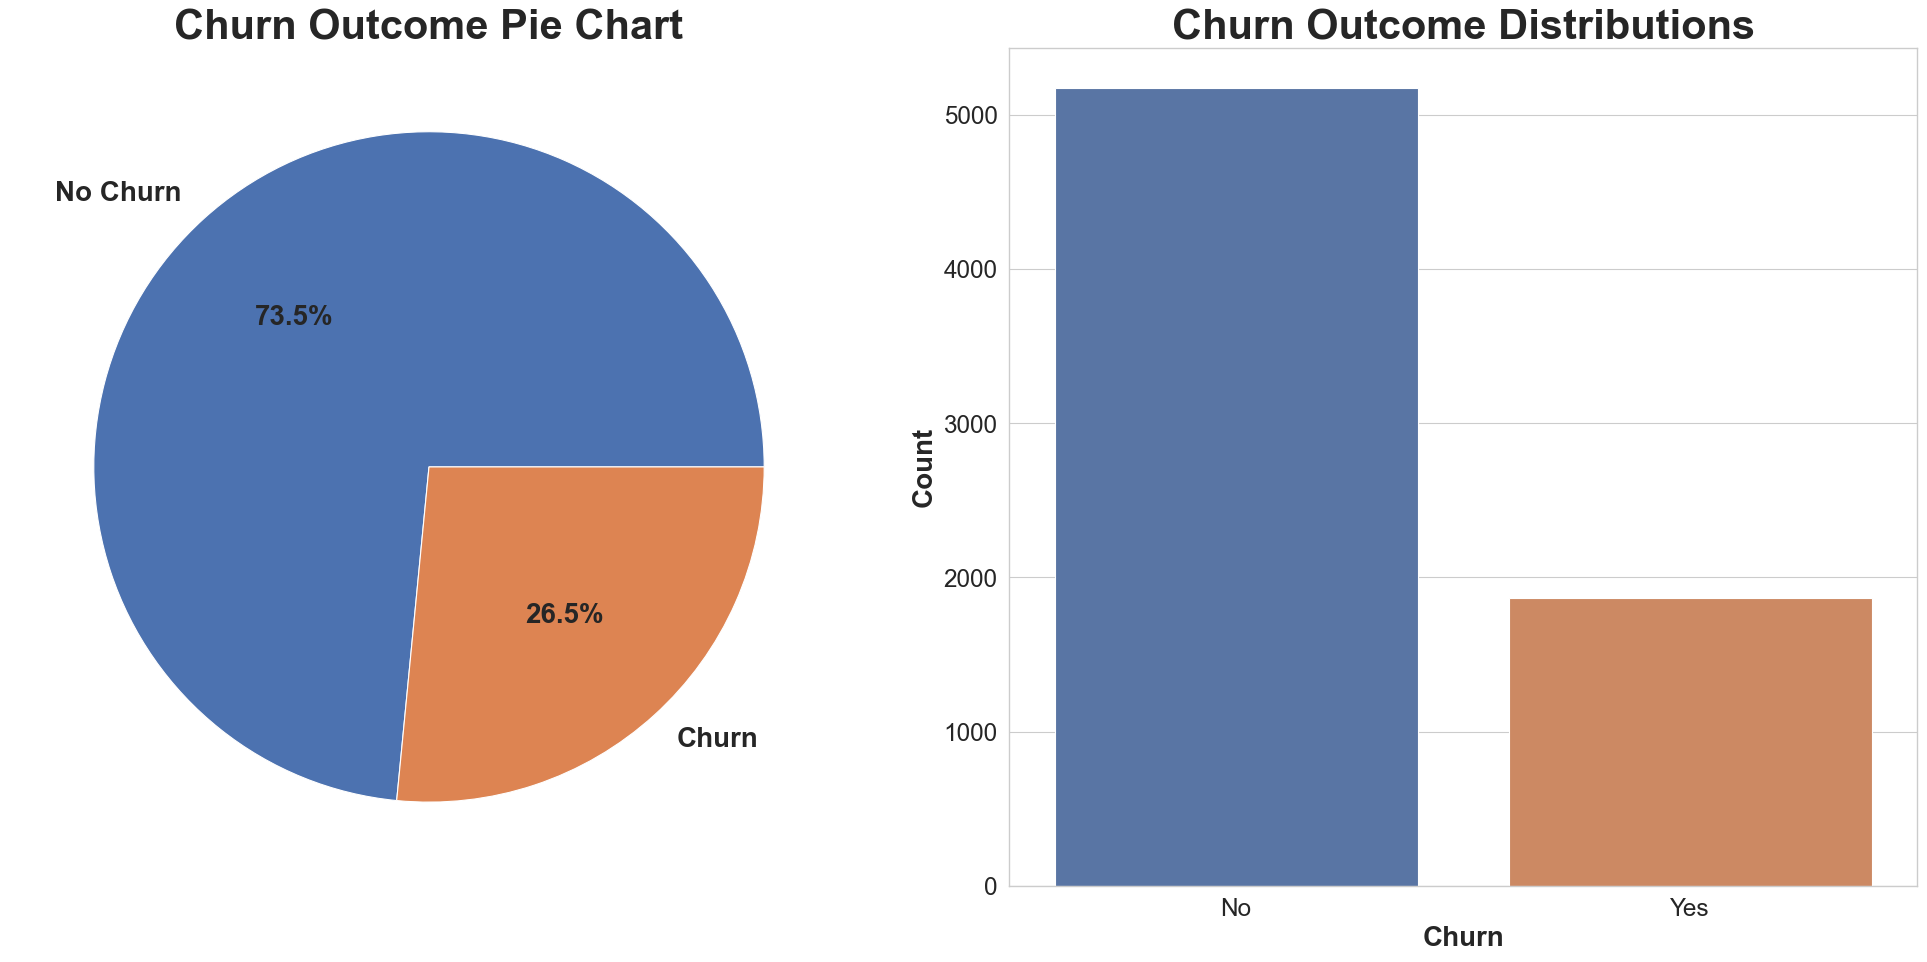

In [9]:
plot_target_dist(df)

Imbalance dataset 
Need to do oversampling or undersampling 

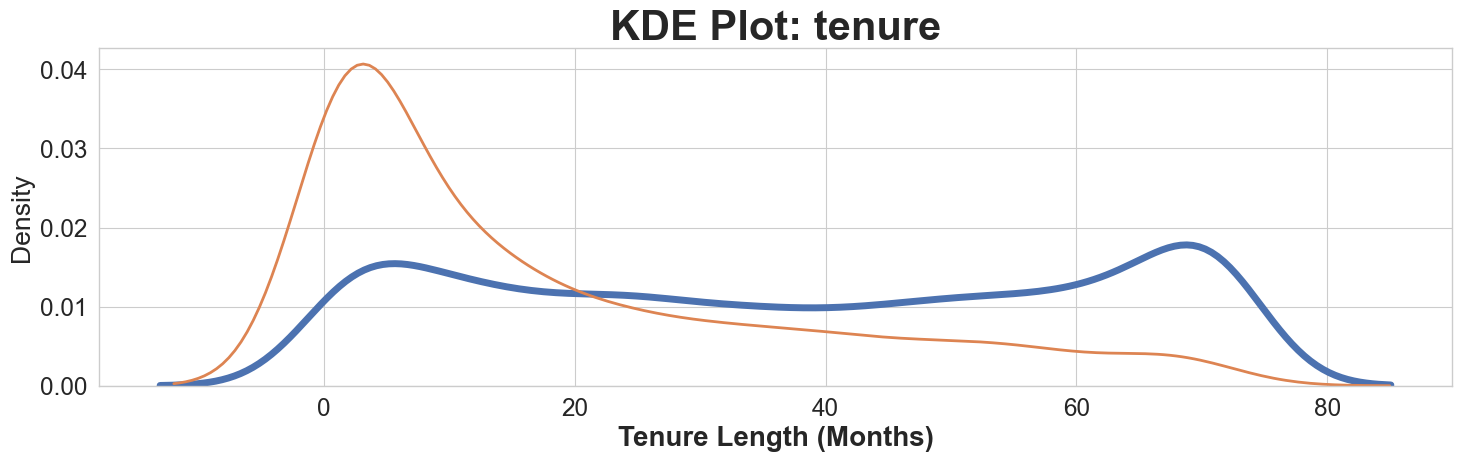

In [10]:
plot_kde(df, 'tenure')
#Kernel-Density-Estimation plot in order to visualize the probability distributions of the relative variables

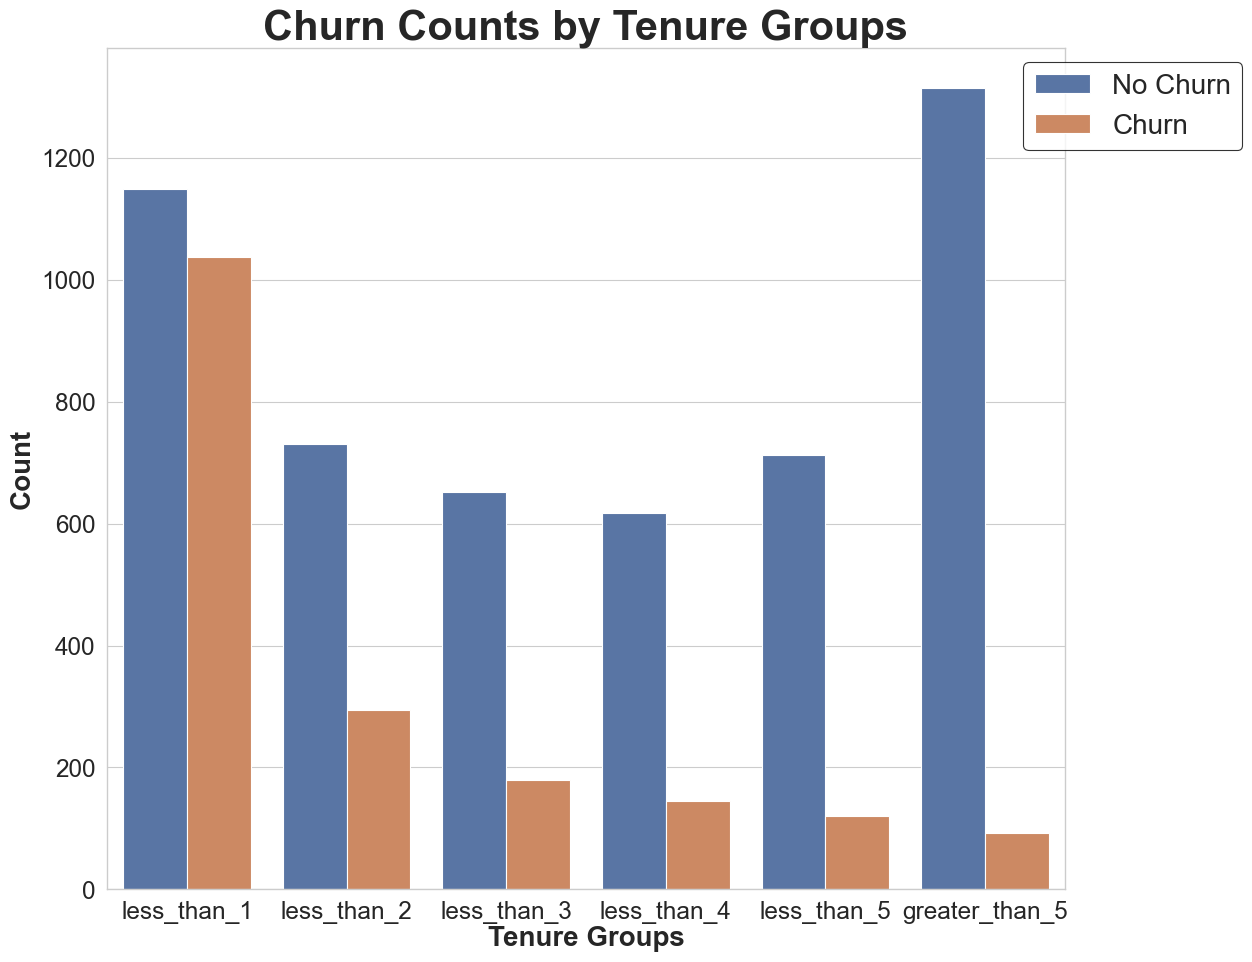

In [11]:
df['grouped_tenure'] = df.apply(lambda df: tenure_groups(df), axis = 1)
tenure_group_counts(df)

- Tenure: Customers with lower service tenures (newer clients) have a higher probability of churning than those with long tenures.

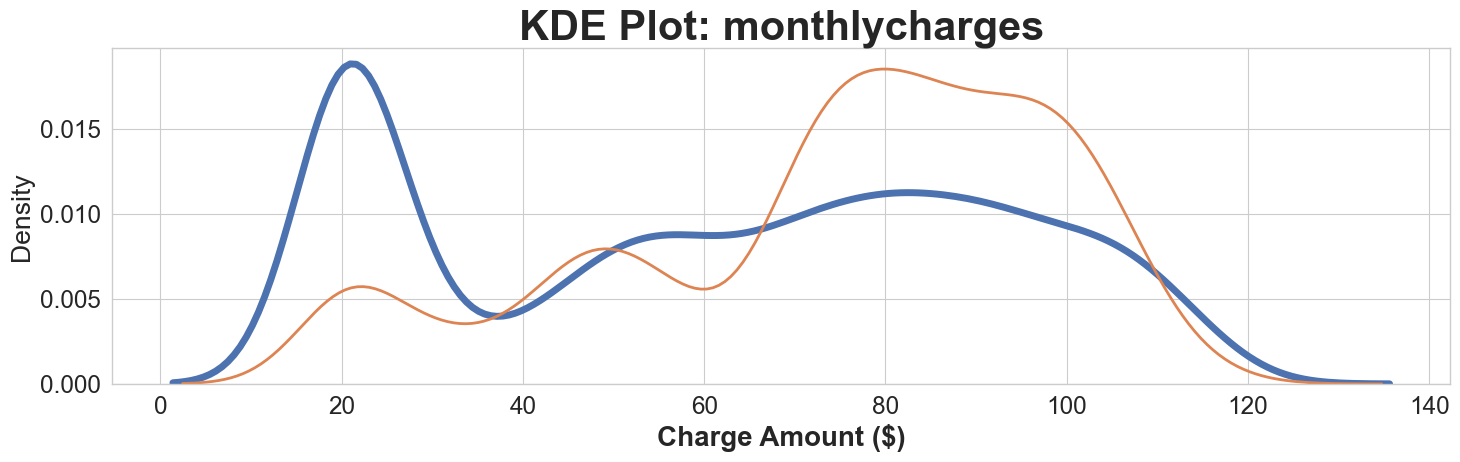

In [12]:
plot_kde(df, 'monthlycharges')

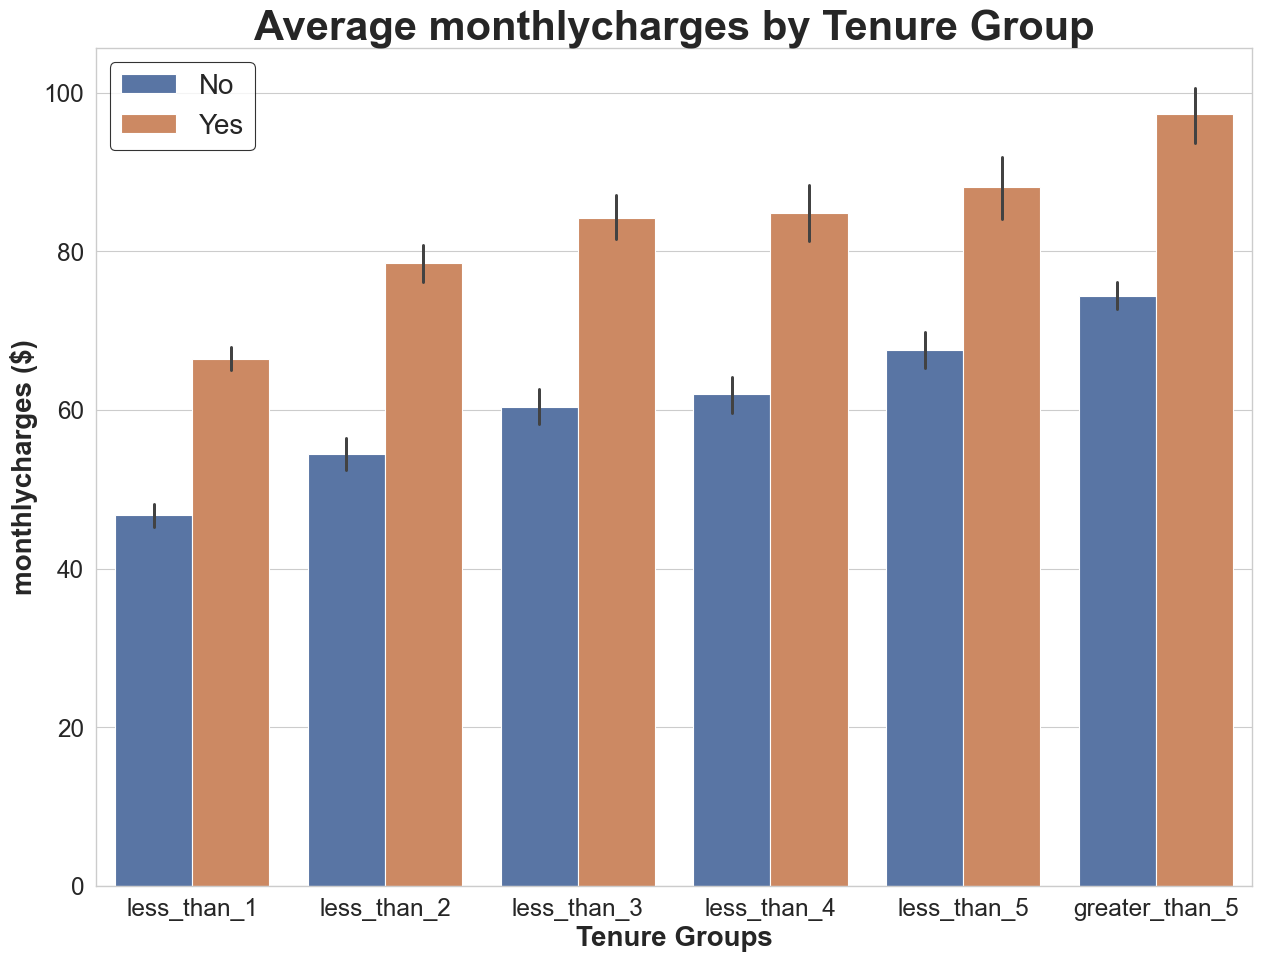

In [13]:
plot_numerical_averages(df, 'monthlycharges')

- Monthly Charges: Generally speaking, Likelihood of a customer churning increases as charges increase, and customers have the highest probability of churning when their monthly charges exceed 60 dollars. Customers who do not churn are most likely to have bills around 20 dollars, followed by just over 80 dollars. 

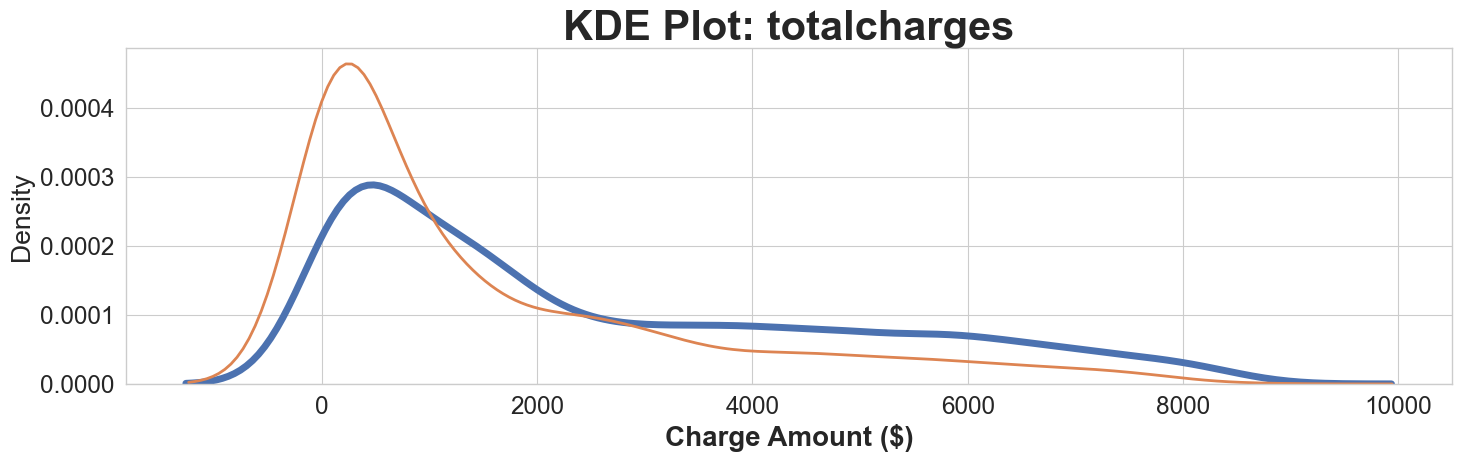

In [14]:
plot_kde(df, 'totalcharges')

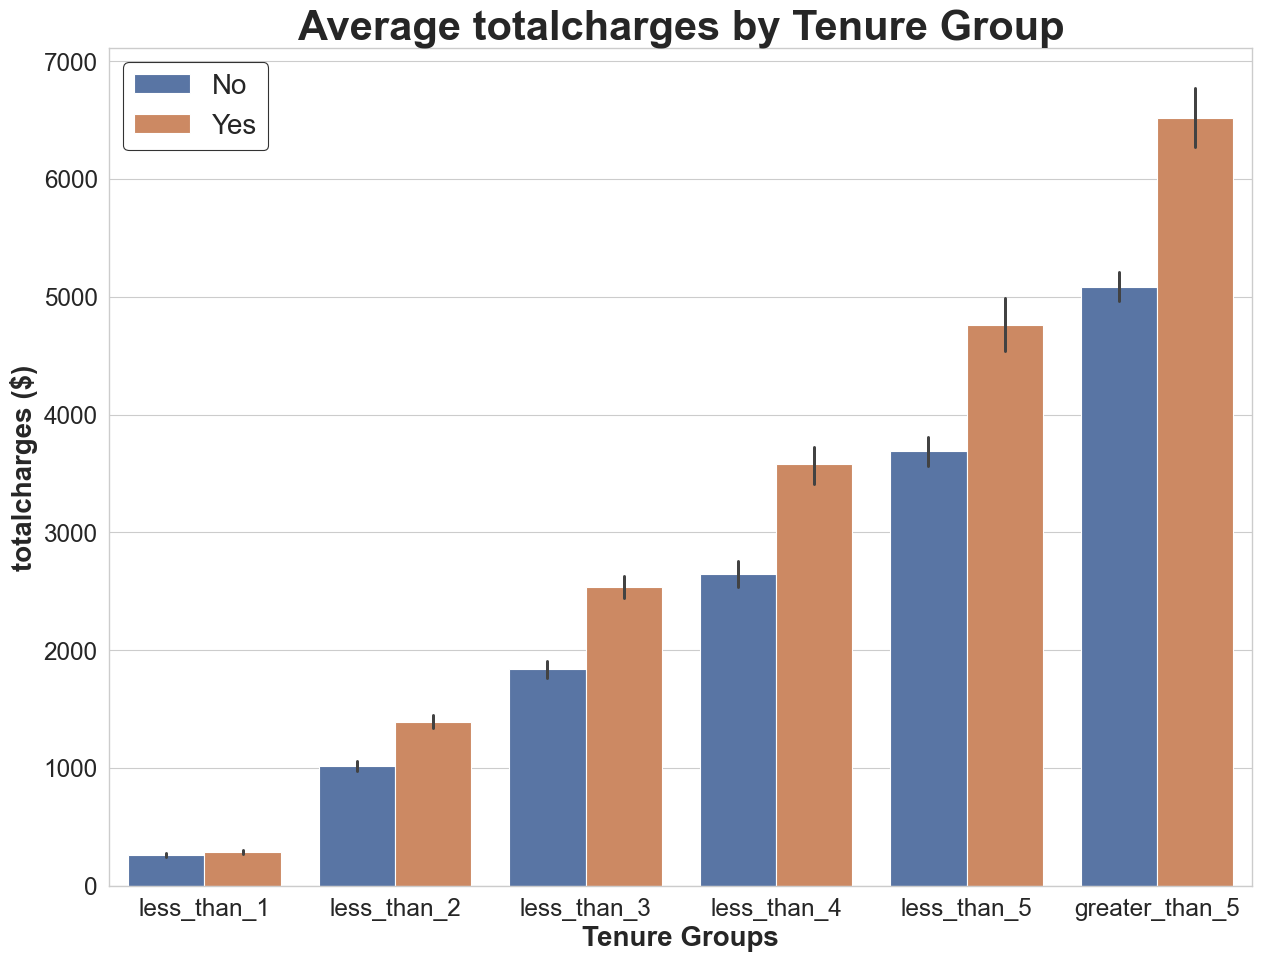

In [15]:
plot_numerical_averages(df, 'totalcharges')


 - Total Charges: Distributions mostly too general for impact of feature (Monthly is most likely more important)

In [16]:
#Print the unique value 
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [17]:
print_unique_col_values(df)

customerid: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
partner: ['Yes' 'No']
dependents: ['No' 'Yes']
phoneservice: ['No' 'Yes']
multiplelines: ['No phone service' 'No' 'Yes']
internetservice: ['DSL' 'Fiber optic' 'No']
onlinesecurity: ['No' 'Yes' 'No internet service']
onlinebackup: ['Yes' 'No' 'No internet service']
deviceprotection: ['No' 'Yes' 'No internet service']
techsupport: ['No' 'Yes' 'No internet service']
streamingtv: ['No' 'Yes' 'No internet service']
streamingmovies: ['No' 'Yes' 'No internet service']
contract: ['Month-to-month' 'One year' 'Two year']
paperlessbilling: ['Yes' 'No']
paymentmethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
churn: ['No' 'Yes']
grouped_tenure: ['less_than_1' 'less_than_3' 'less_than_4' 'less_than_2' 'greater_than_5'
 'less_than_5']


In [18]:
df.replace('No internet service','No',inplace=True)
#df.replace('No phone service','No',inplace=True)
#BEC no phone service means no phone not the same as no multiple lines 

In [19]:
#Explore Independent Variable 
columns = df.columns
binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

#Categorial Features with 2 classes
binary_cols 

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'paperlessbilling',
 'churn']

the remaining col have multipls classes 

## Binary Categorical Features
Let’s check the class distribution of binary features.

<AxesSubplot:xlabel='paperlessbilling', ylabel='count'>

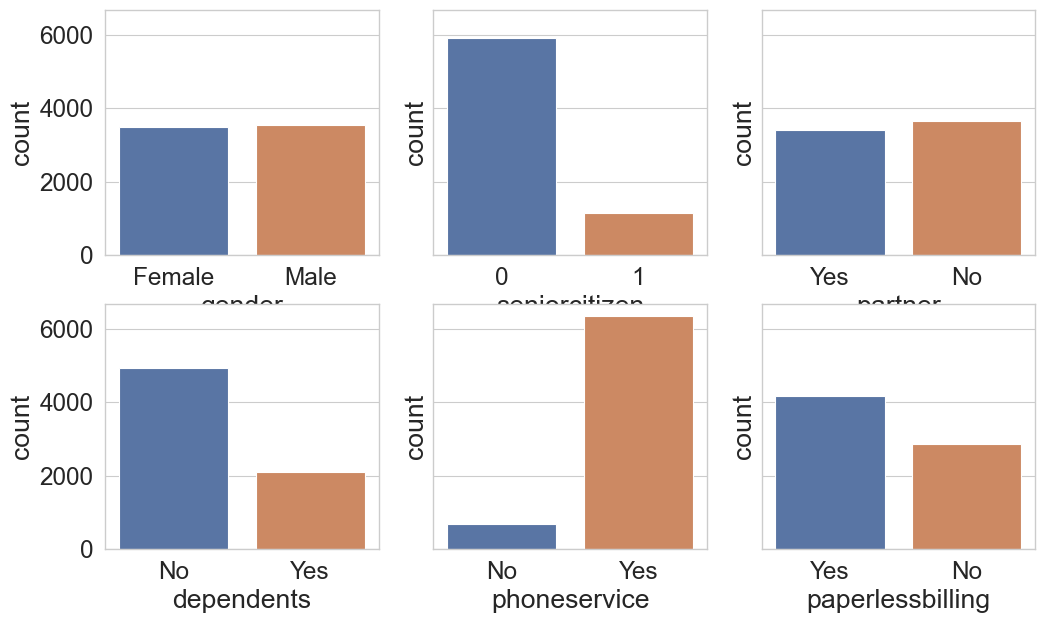

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("seniorcitizen", data=df, ax=axes[0,1])
sns.countplot("partner", data=df, ax=axes[0,2])
sns.countplot("dependents", data=df, ax=axes[1,0])
sns.countplot("phoneservice", data=df, ax=axes[1,1])
sns.countplot("paperlessbilling", data=df, ax=axes[1,2])

There is a high imbalance in SeniorCitizen and PhoneService variables. Most of the customers are not senior and similarly, most customers have a phone service.

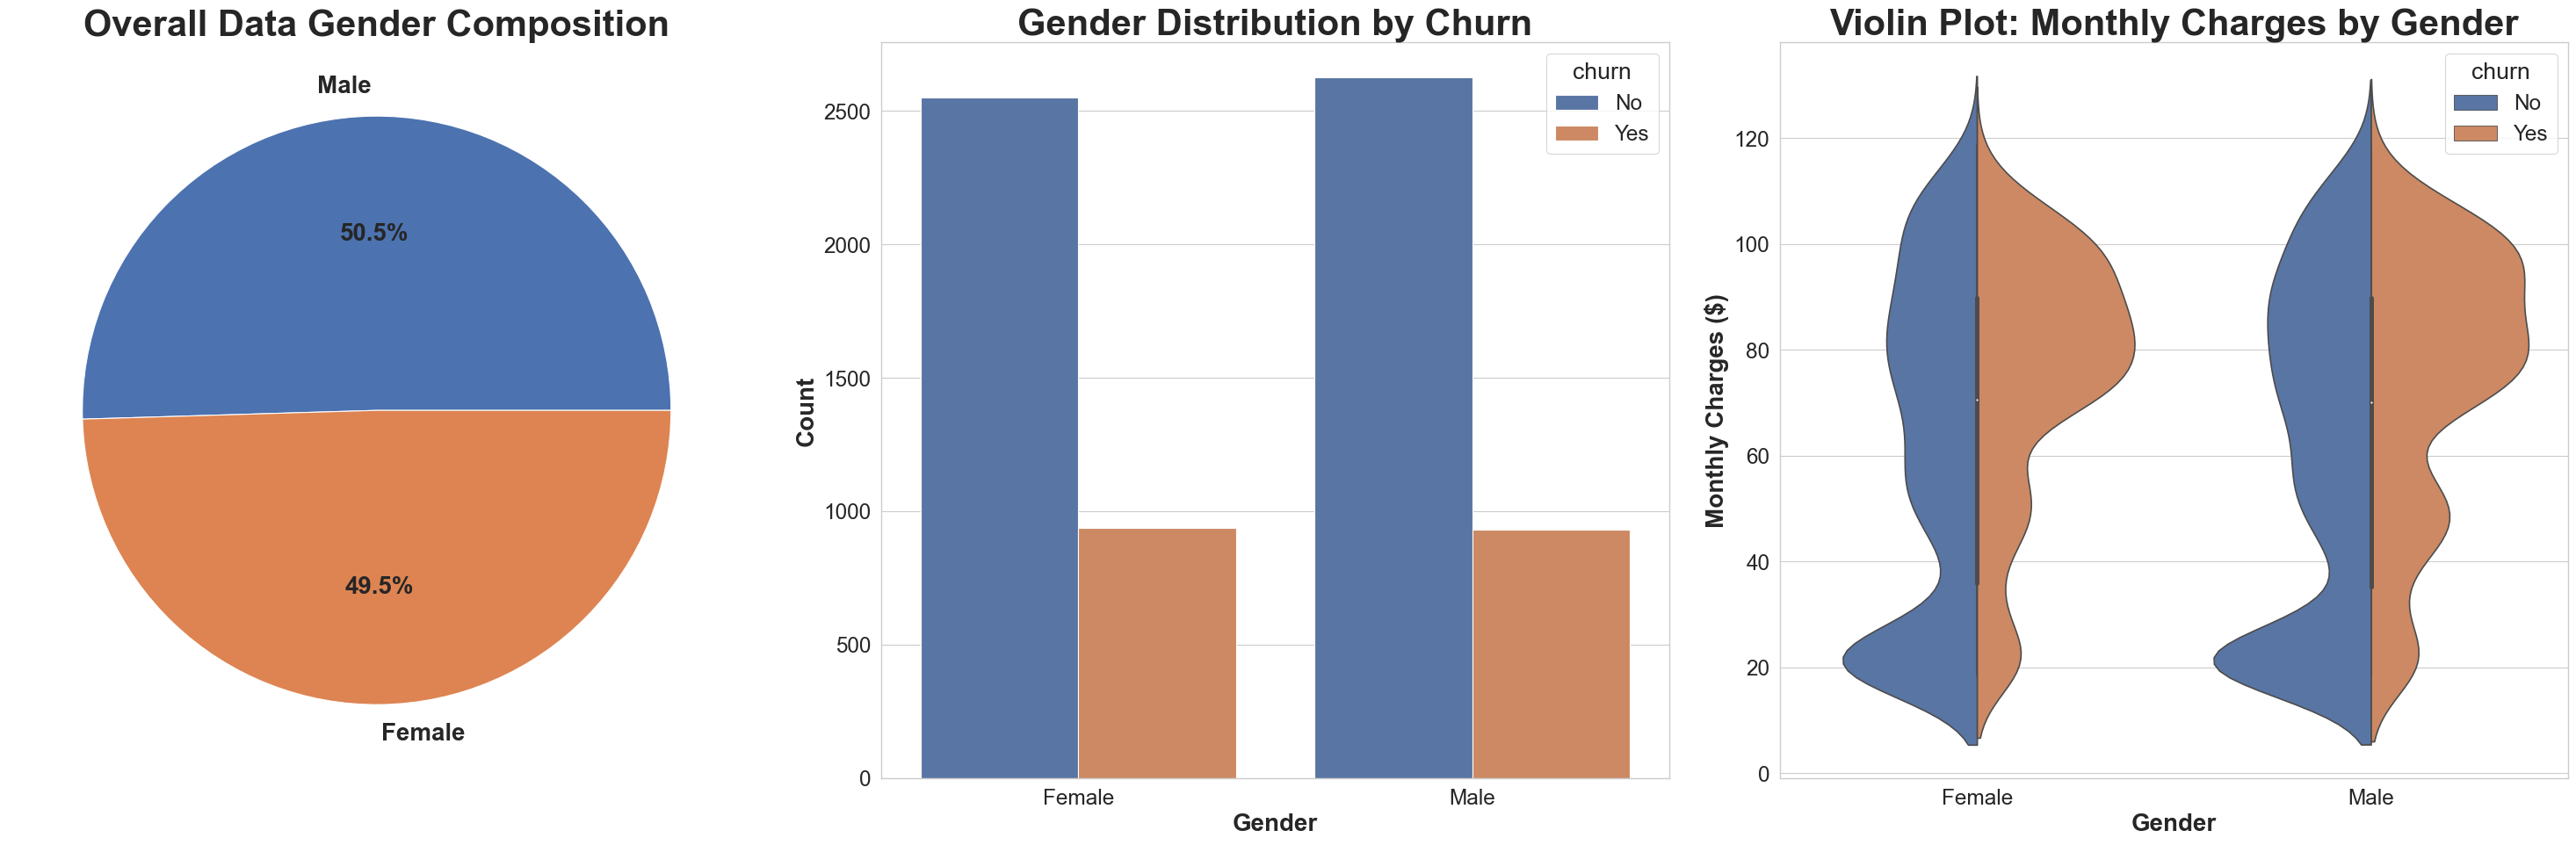

In [21]:
#Gender
plot_gender_dist(df)

In [22]:
churn_numeric = {'Yes':1, 'No':0}
df.churn.replace(churn_numeric, inplace=True)

In [23]:
#Let’s see if churn rate is different for males and females:
df[['gender','churn']].groupby(['gender']).mean()

,churn
gender,
Female,0.269209
Male,0.261603


Gender is equivalent in representation in our dataset and does not appear to be an indicator of Churn

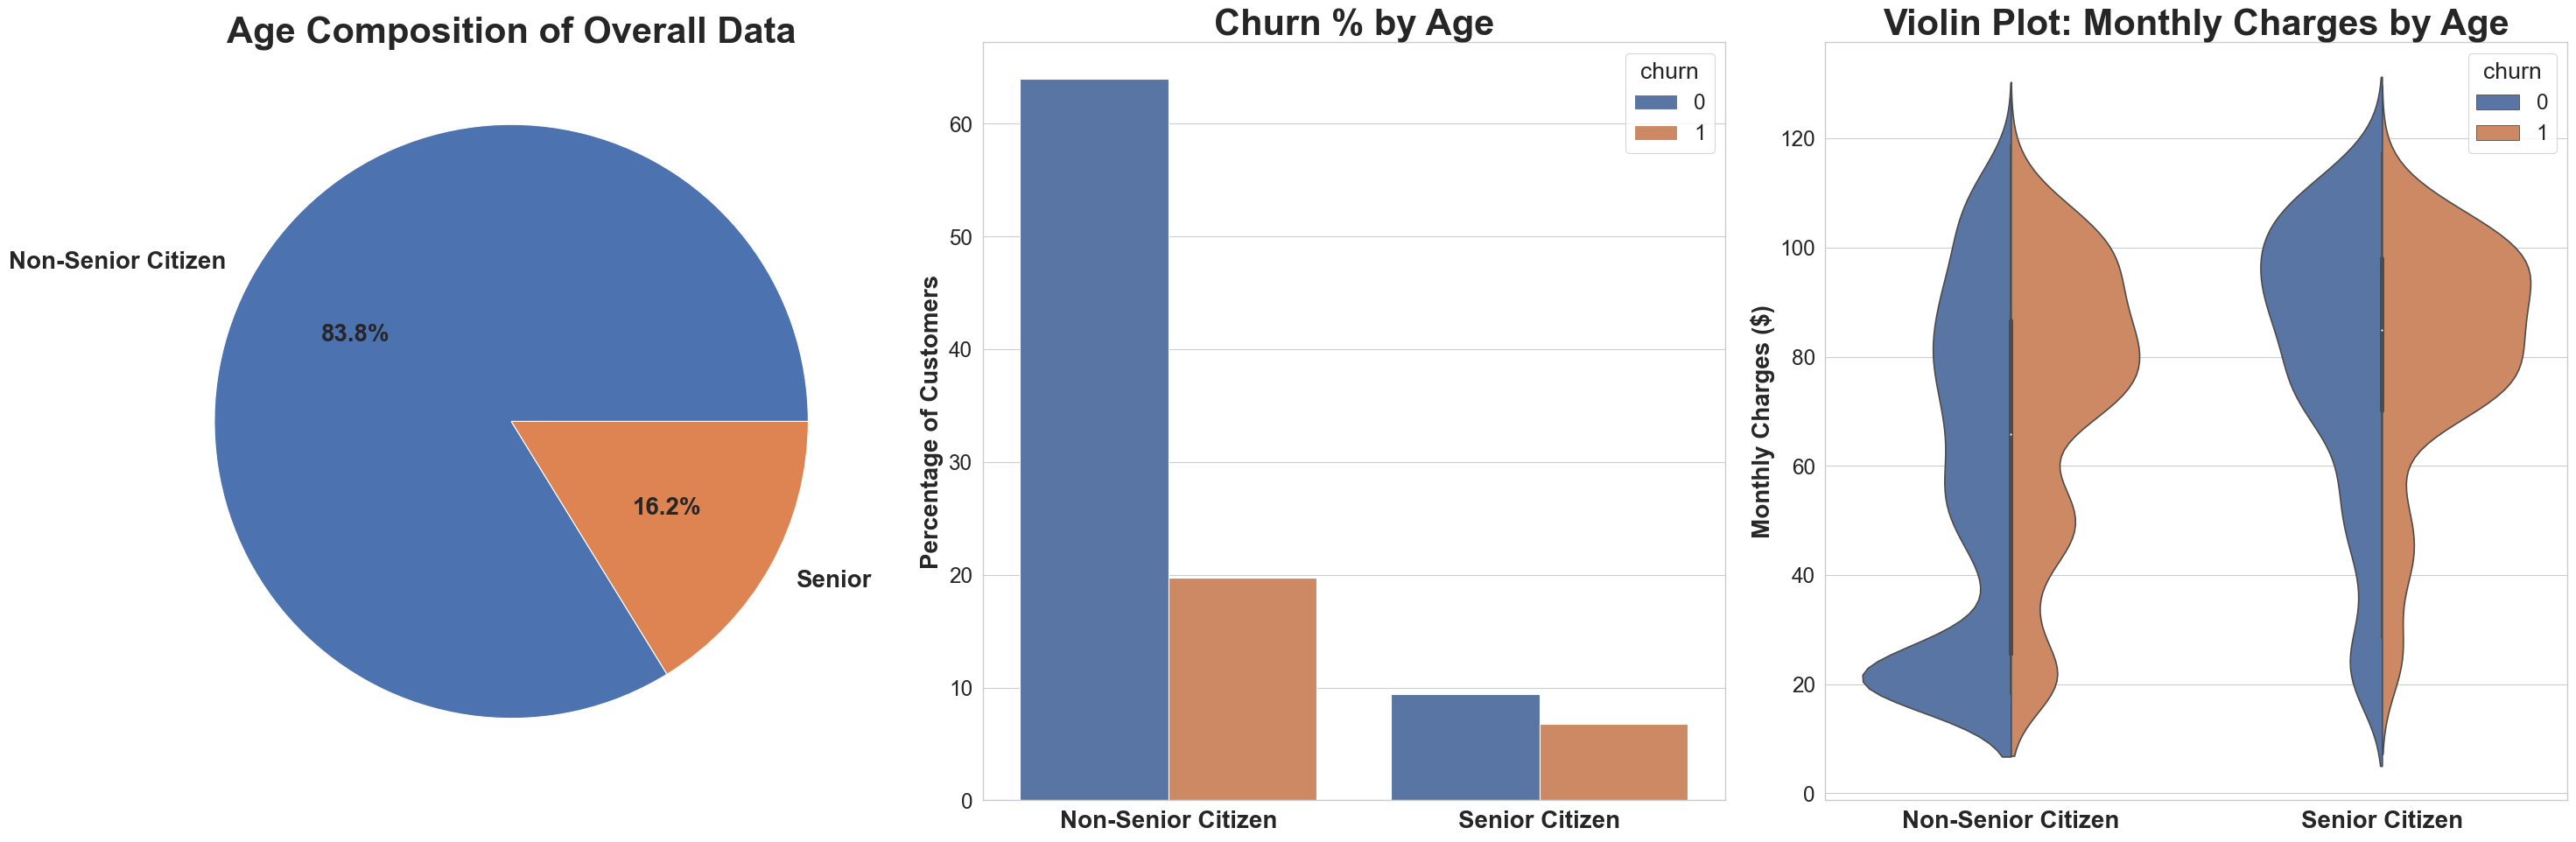

In [24]:
plot_age_dist(df)

In [25]:
#Let’s see if churn rate is different for senior citizen or not 
df[['seniorcitizen','churn']].groupby(['seniorcitizen']).mean()

,churn
seniorcitizen,
0,0.236062
1,0.416813


 * Our dataset has significantly less senior citizens than non-seniors (only 16% are senior)
 * Overall, more non-senior citizens churn than senior citizens
 * A higher proportion of senior citizens churn than non-senior citizens

In [26]:
table = pd.pivot_table(df, values='churn', index=['gender'],
                    columns=['seniorcitizen'], aggfunc=np.mean)
table

seniorcitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


In [27]:
df[['partner','churn']].groupby(['partner']).mean()

,churn
partner,
No,0.329580
Yes,0.196649


In [28]:
df[['dependents','churn']].groupby(['dependents']).mean()

,churn
dependents,
No,0.312791
Yes,0.154502


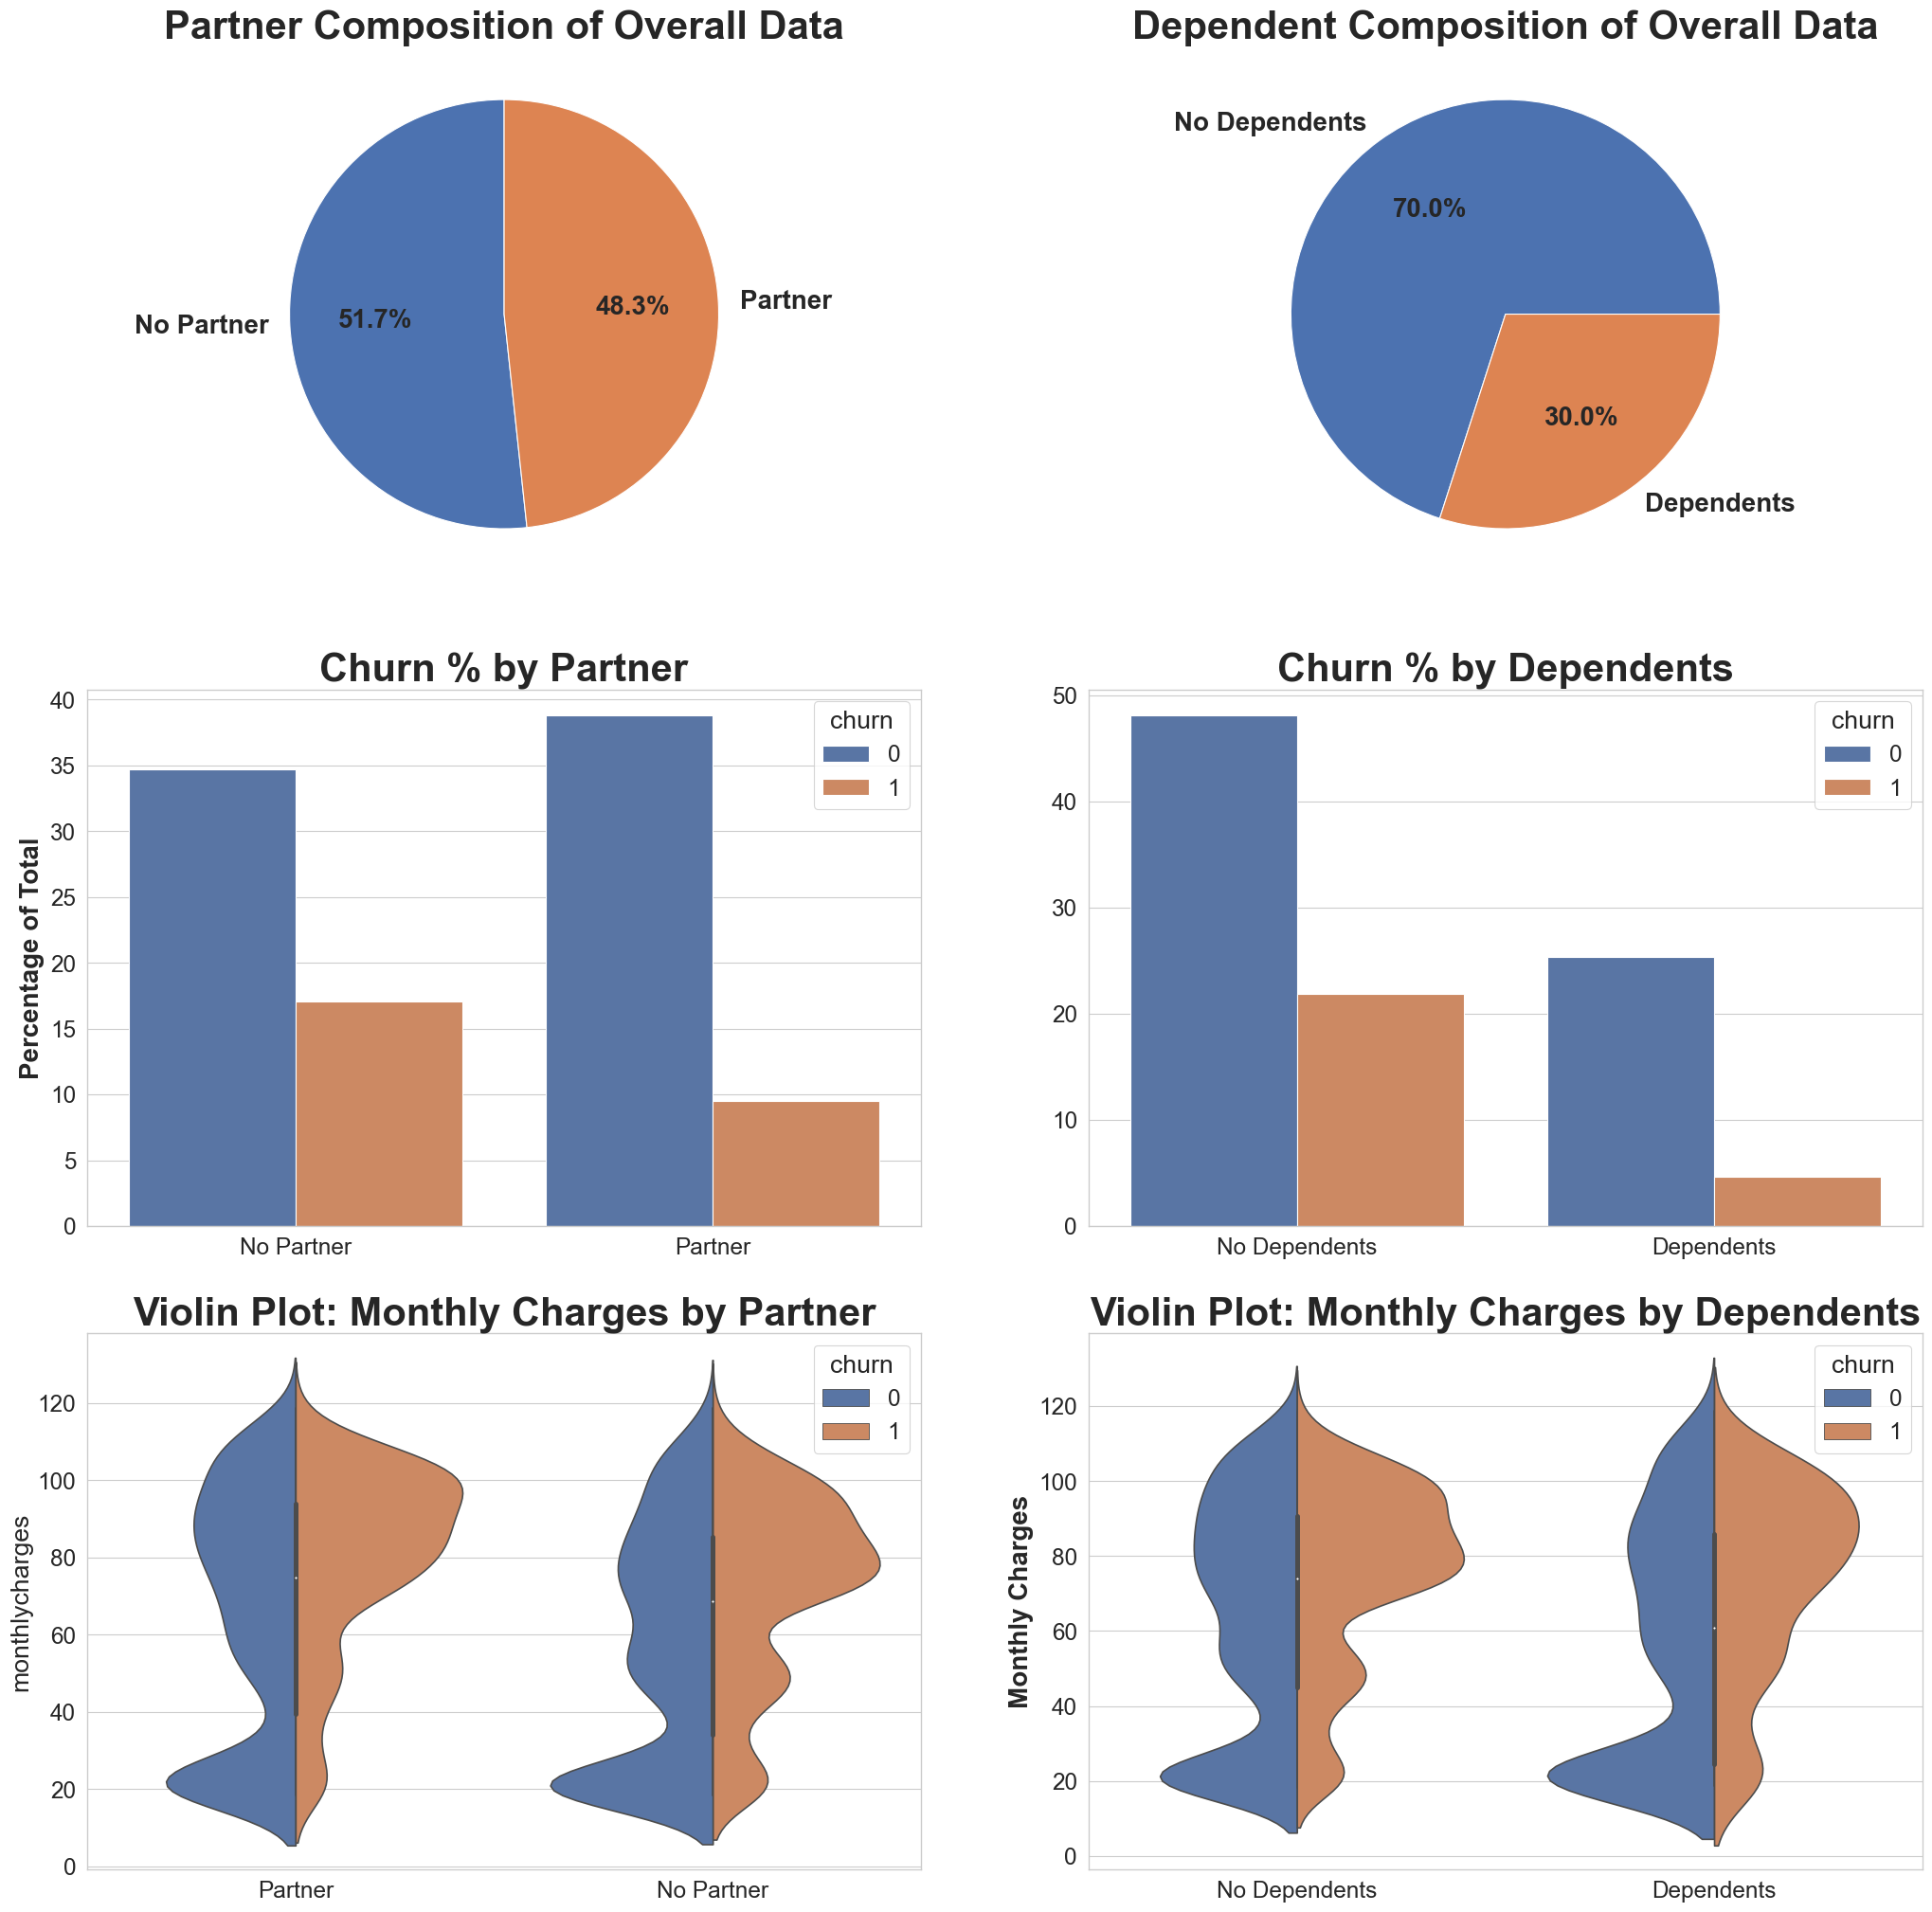

In [29]:
plot_partner_dependents(df)

**Partner/Dependent Conclusions:**
- Overall, those without partners are more likely to churn than those with partners
- Customers without dependents are more likely to churn than those with dependents

In [30]:
df[['phoneservice','churn']].groupby(['phoneservice']).mean()

,churn
phoneservice,
No,0.249267
Yes,0.267096


The other binary features have an effect on the target variable. The phone service may also be skipped if you think 2% difference can be ignored. I have decided to use this feature in the model.|

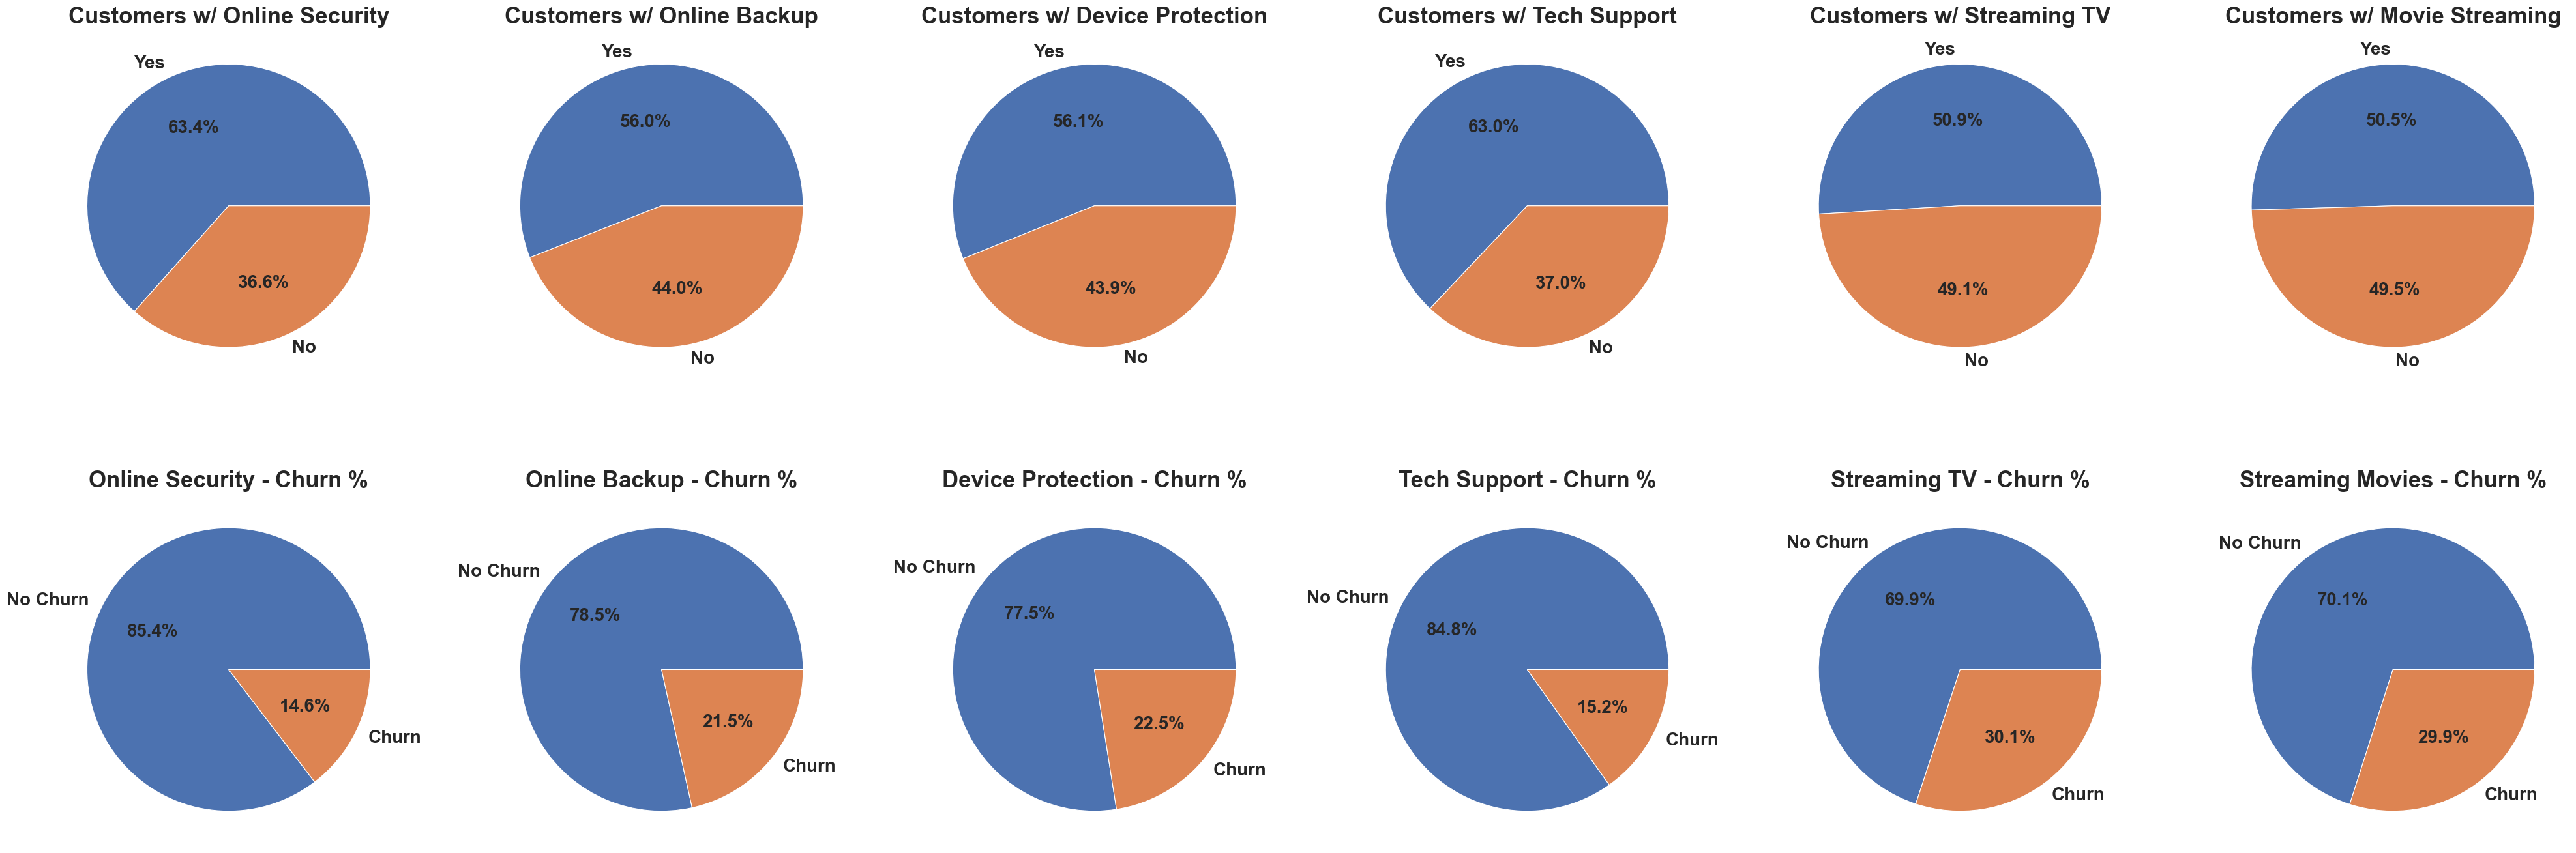

In [31]:
plot_services(df)

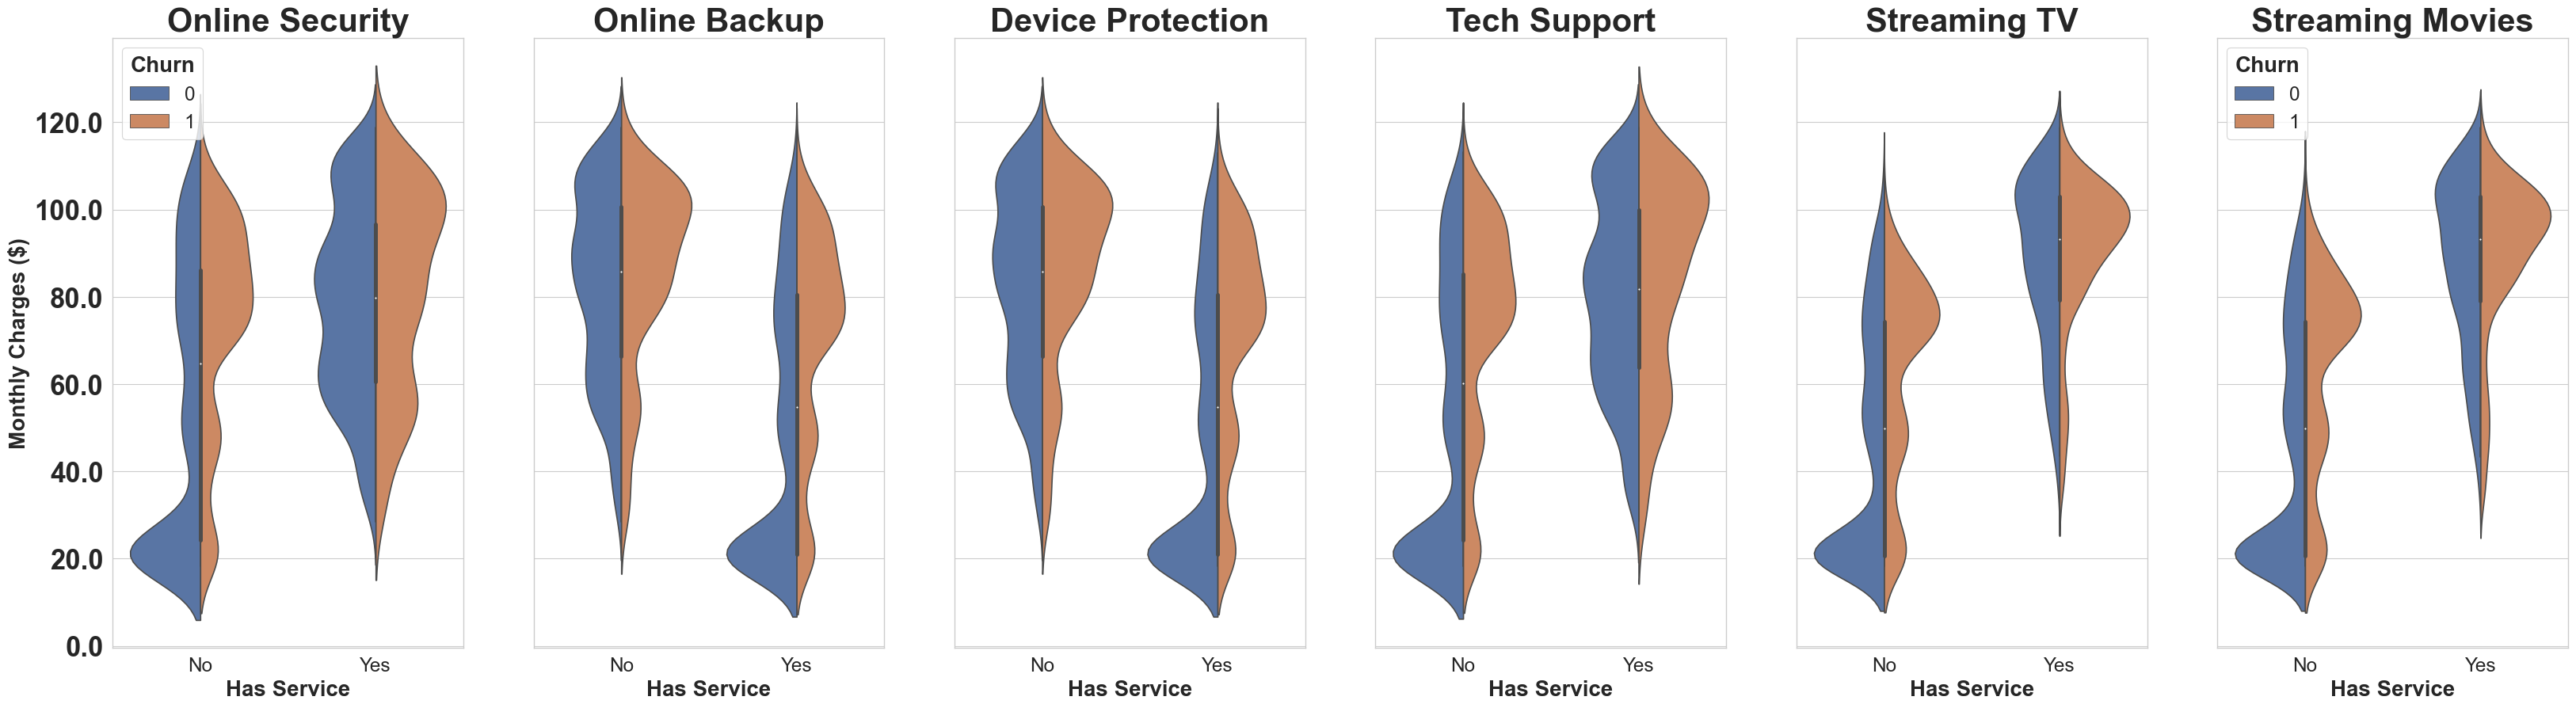

In [32]:
plot_service_charges(df)

**Add-On Service Conclusions:**
- Customers with TV Streaming and/or Movie streaming services churn more than all other services. 
- Churn for customers in most categories peaks around a monthly charge of $100

<AxesSubplot:xlabel='techsupport', ylabel='count'>

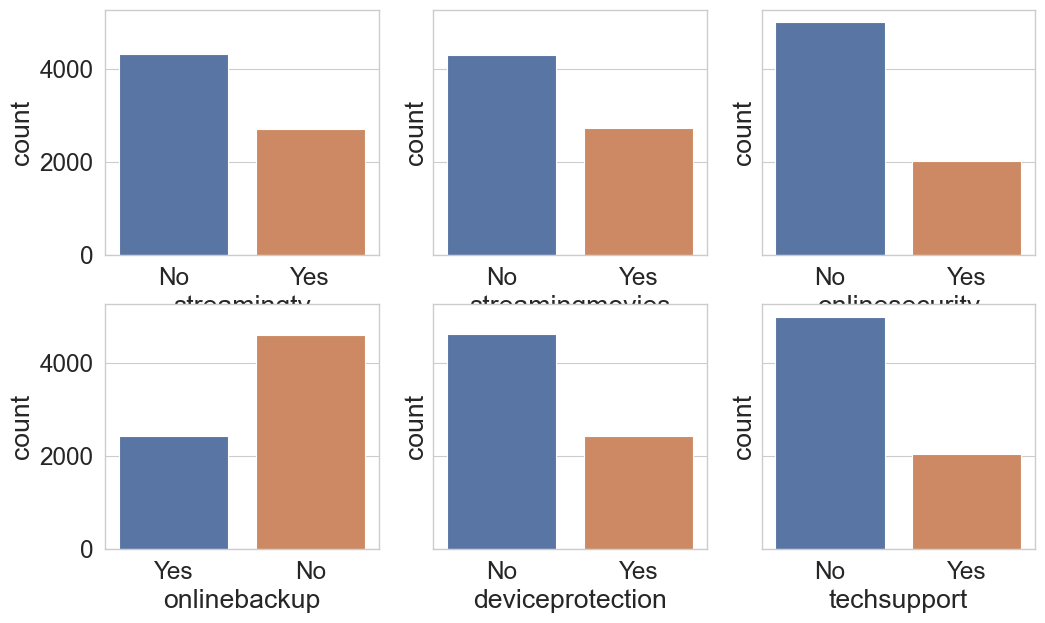

In [33]:
#factor of assuming Internet Service much 
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("streamingtv", data=df, ax=axes[0,0])
sns.countplot("streamingmovies", data=df, ax=axes[0,1])
sns.countplot("onlinesecurity", data=df, ax=axes[0,2])
sns.countplot("onlinebackup", data=df, ax=axes[1,0])
sns.countplot("deviceprotection", data=df, ax=axes[1,1])
sns.countplot("techsupport", data=df, ax=axes[1,2])

All internet service related features seem to have different churn rates for their classes because churn rate changes according to customers having these services. The difference on StreamingTV and StreamingMovies are not much but they can still bring value to the model. You may decide not to include these two features.

In [34]:
#See how different the Streaming TV and Streaming Movie 
df[['streamingtv','churn']].groupby(['streamingtv']).mean()

,churn
streamingtv,
No,0.243312
Yes,0.300702


In [35]:
#See how different the Streaming TV and Streaming Movie 
df[['streamingmovies','churn']].groupby(['streamingmovies']).mean()

,churn
streamingmovies,
No,0.243795
Yes,0.299414


In [36]:
df[['paperlessbilling','churn']].groupby(['paperlessbilling']).mean()

,churn
paperlessbilling,
No,0.163301
Yes,0.335651


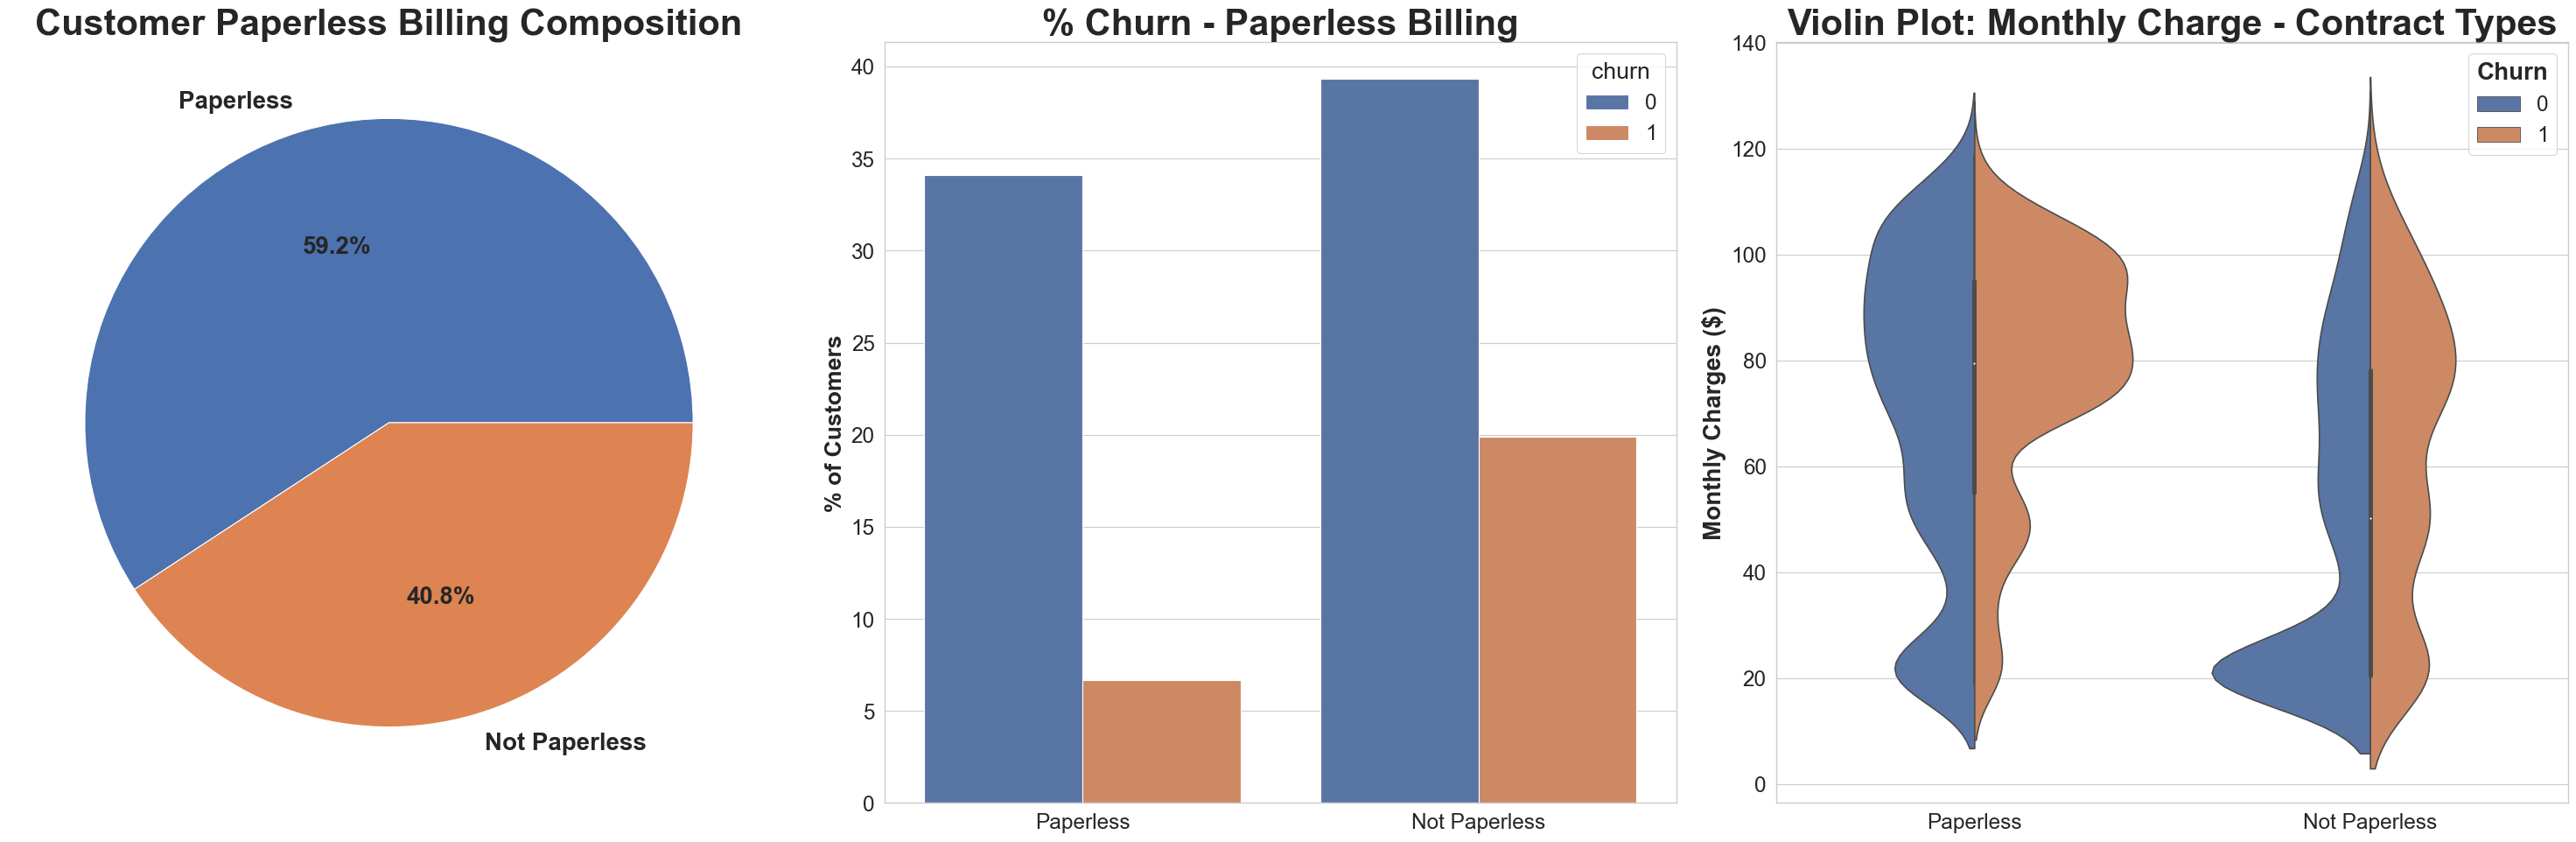

In [37]:
plot_paperless(df)

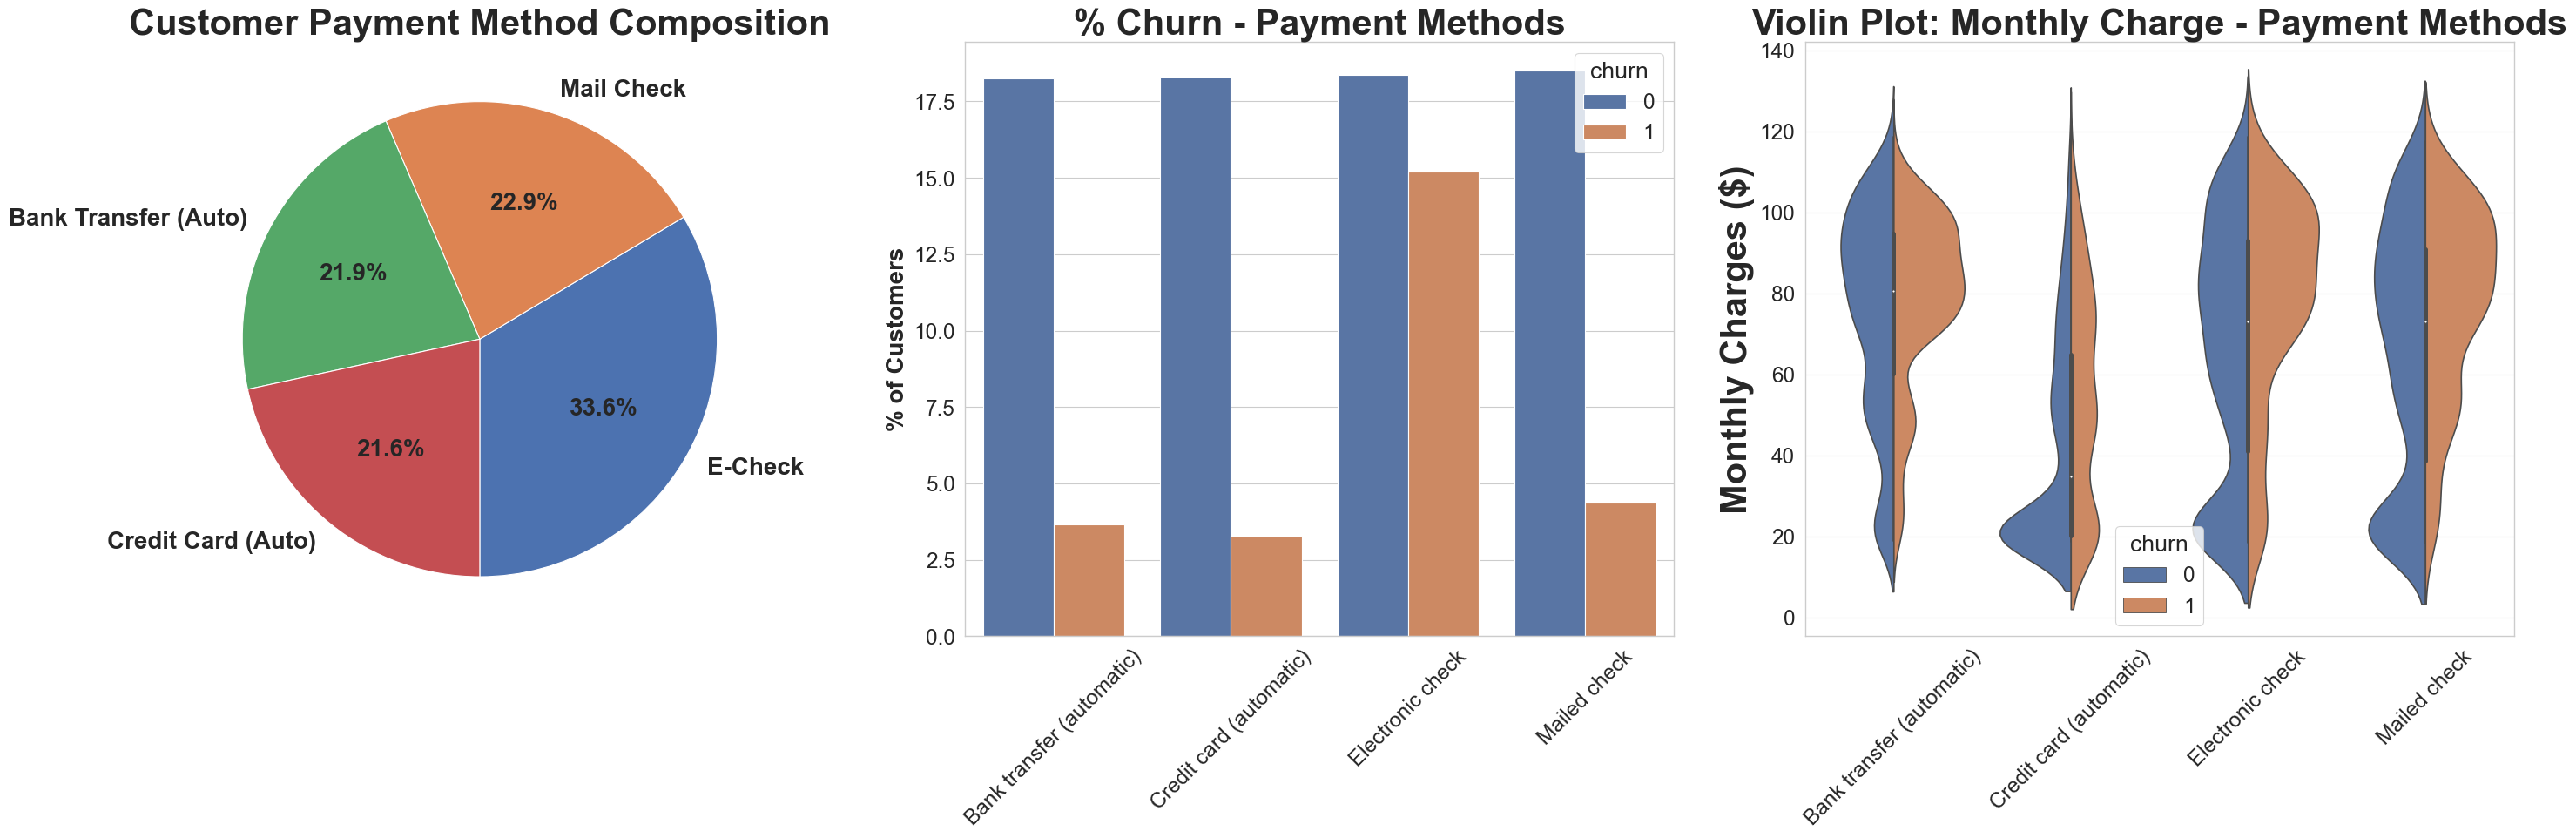

In [38]:
plot_pay_methods(df)

**Payments Inference:**
- Customers with non-paperless billing churn almost 15% more than paperless customers
- Paperless customers churn at similar rates as non-paperless customers when the monthly price is below 60 dollars, once above 60 more paperless customers churn than non-paperless
- Customers who pay with e-check churn more than 10% than customers with all other payment methods
- Customers who pay by credit card have consistent churn rates regardless of monthly charge, whereas customers paying by bank transfer, e-chcek, or mailed check all see an up-tick in churn once monthly charges rise above 60.

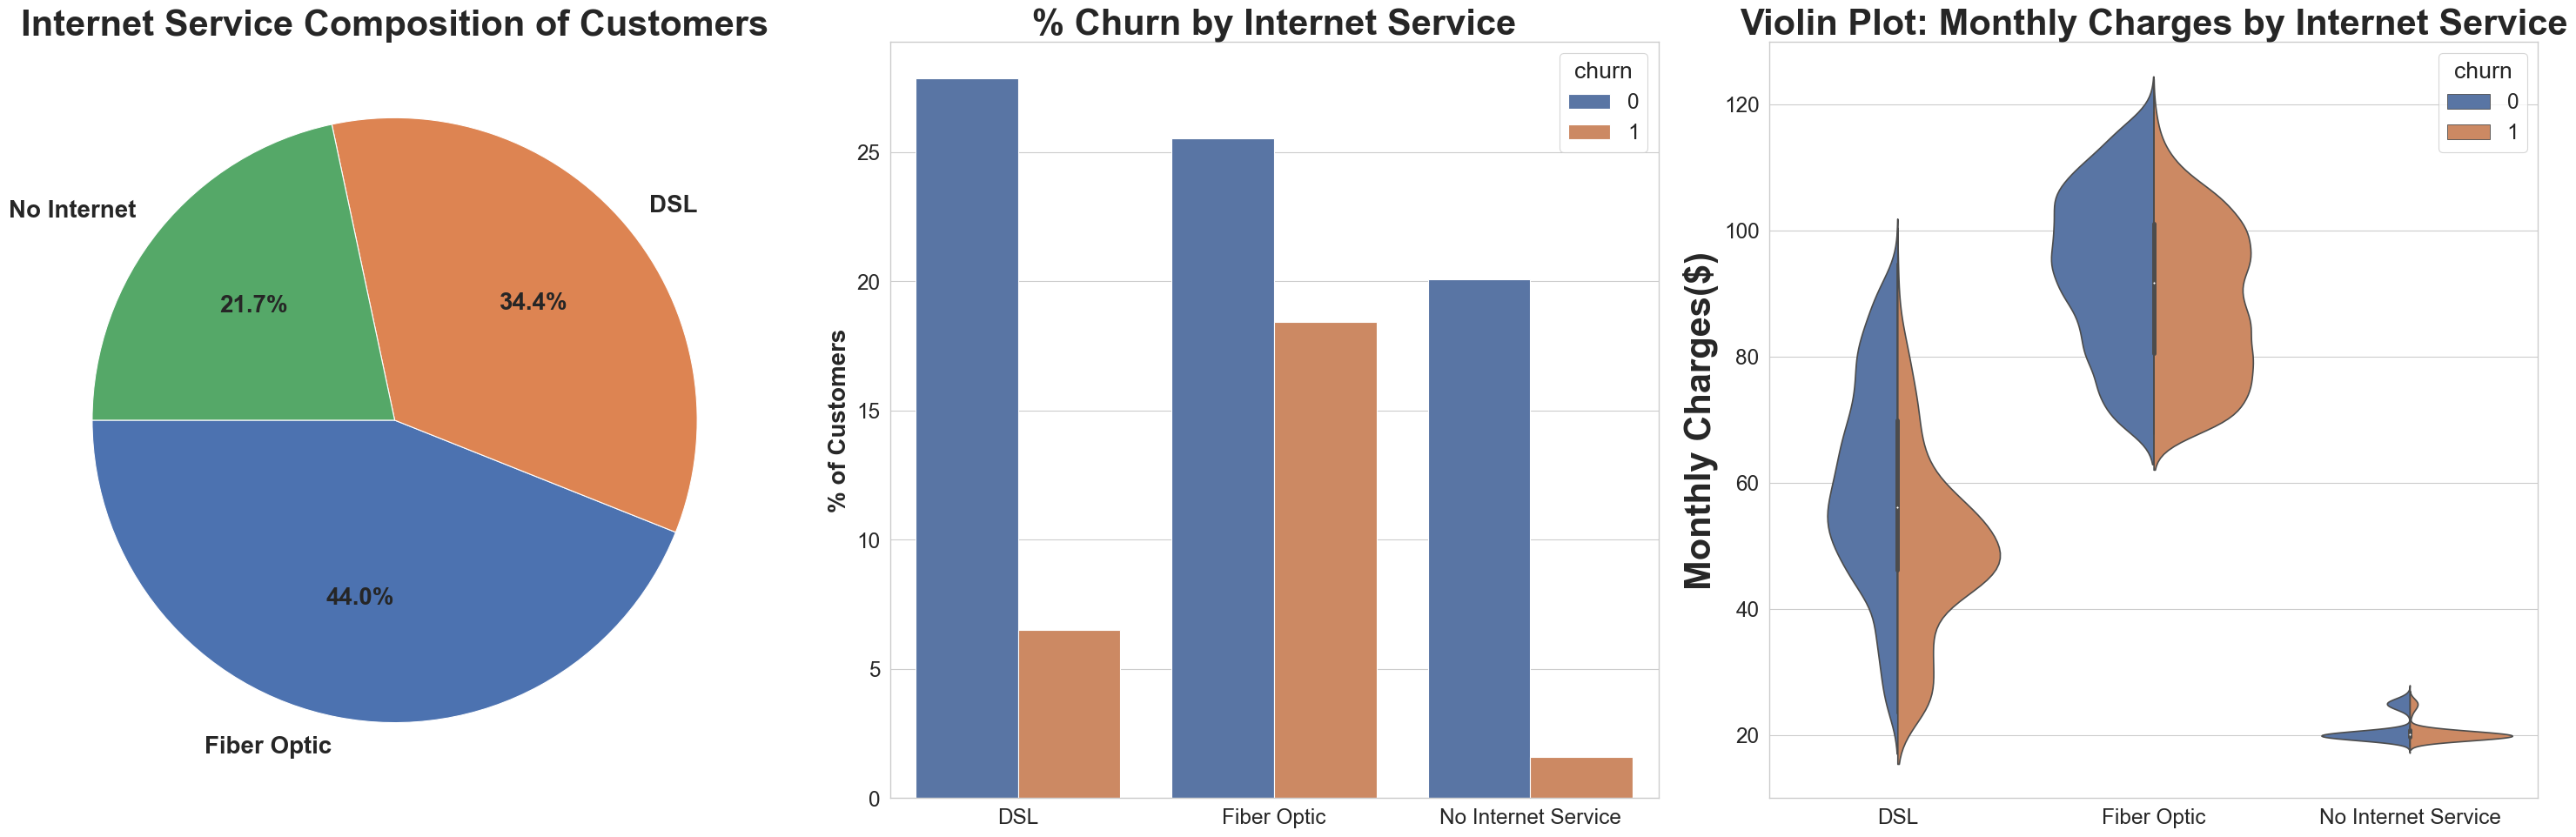

In [39]:
plot_internet_services(df)

<AxesSubplot:xlabel='internetservice', ylabel='count'>

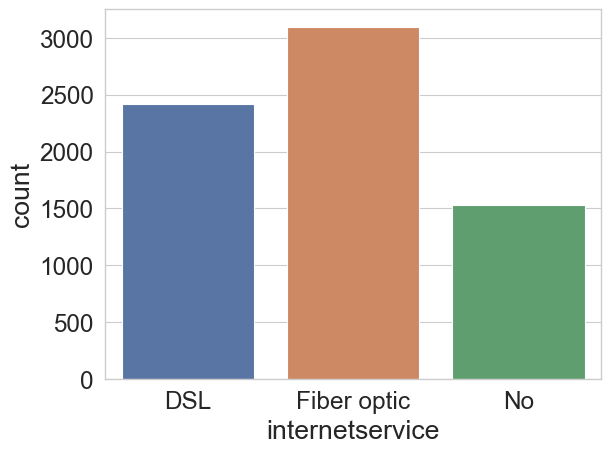

In [40]:
sns.countplot("internetservice", data=df)

In [41]:
df[['internetservice','churn']].groupby(['internetservice']).mean()

,churn
internetservice,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


Internet service variable is definitely important in predicting churn rate. As you can see, customers with fiber optic internet service are much likely to churn than other customers although there is not a big difference in the number of customers with DSL and fiber optic. This company may have some problems with fiber optic connection. However, it is not a good way to make assumptions based on only one variable. Let’s also check the monthly charges. PLus these 2 variables are related with each other 

In [42]:
df[['internetservice','monthlycharges']].groupby(['internetservice']).mean()

,monthlycharges
internetservice,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


Fiber Optic Service is much more expensive than DSL which may be one of the reasons why customers stop using the service 

In [43]:
#Value of Phone Services
df.phoneservice.value_counts()

Yes    6361
No      682
Name: phoneservice, dtype: int64

In [44]:
df.multiplelines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiplelines, dtype: int64

If a customer does not have a phone service, he/she cannot have multiple lines. MultipleLines column includes more specific data compared to PhoneService column. 

<AxesSubplot:xlabel='contract', ylabel='count'>

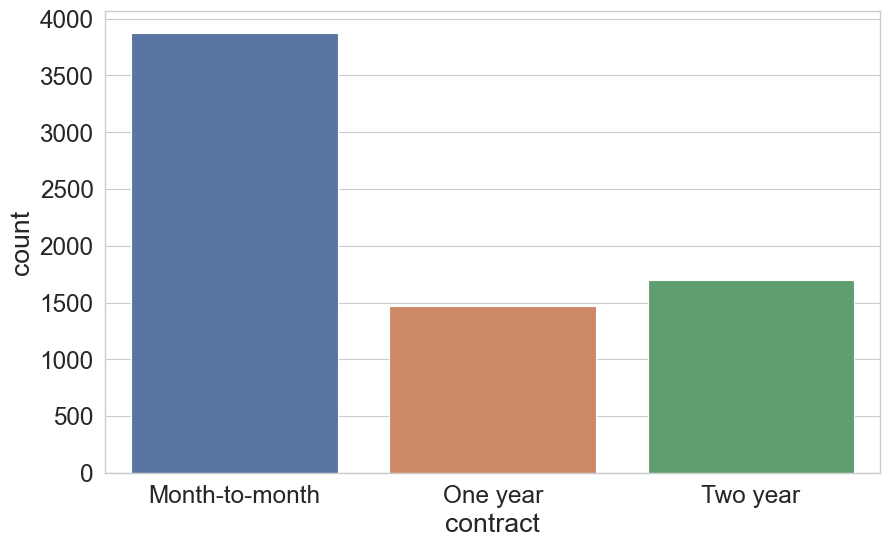

In [45]:
#Contract and Payment Method 
plt.figure(figsize=(10,6))
sns.countplot("contract", data=df)

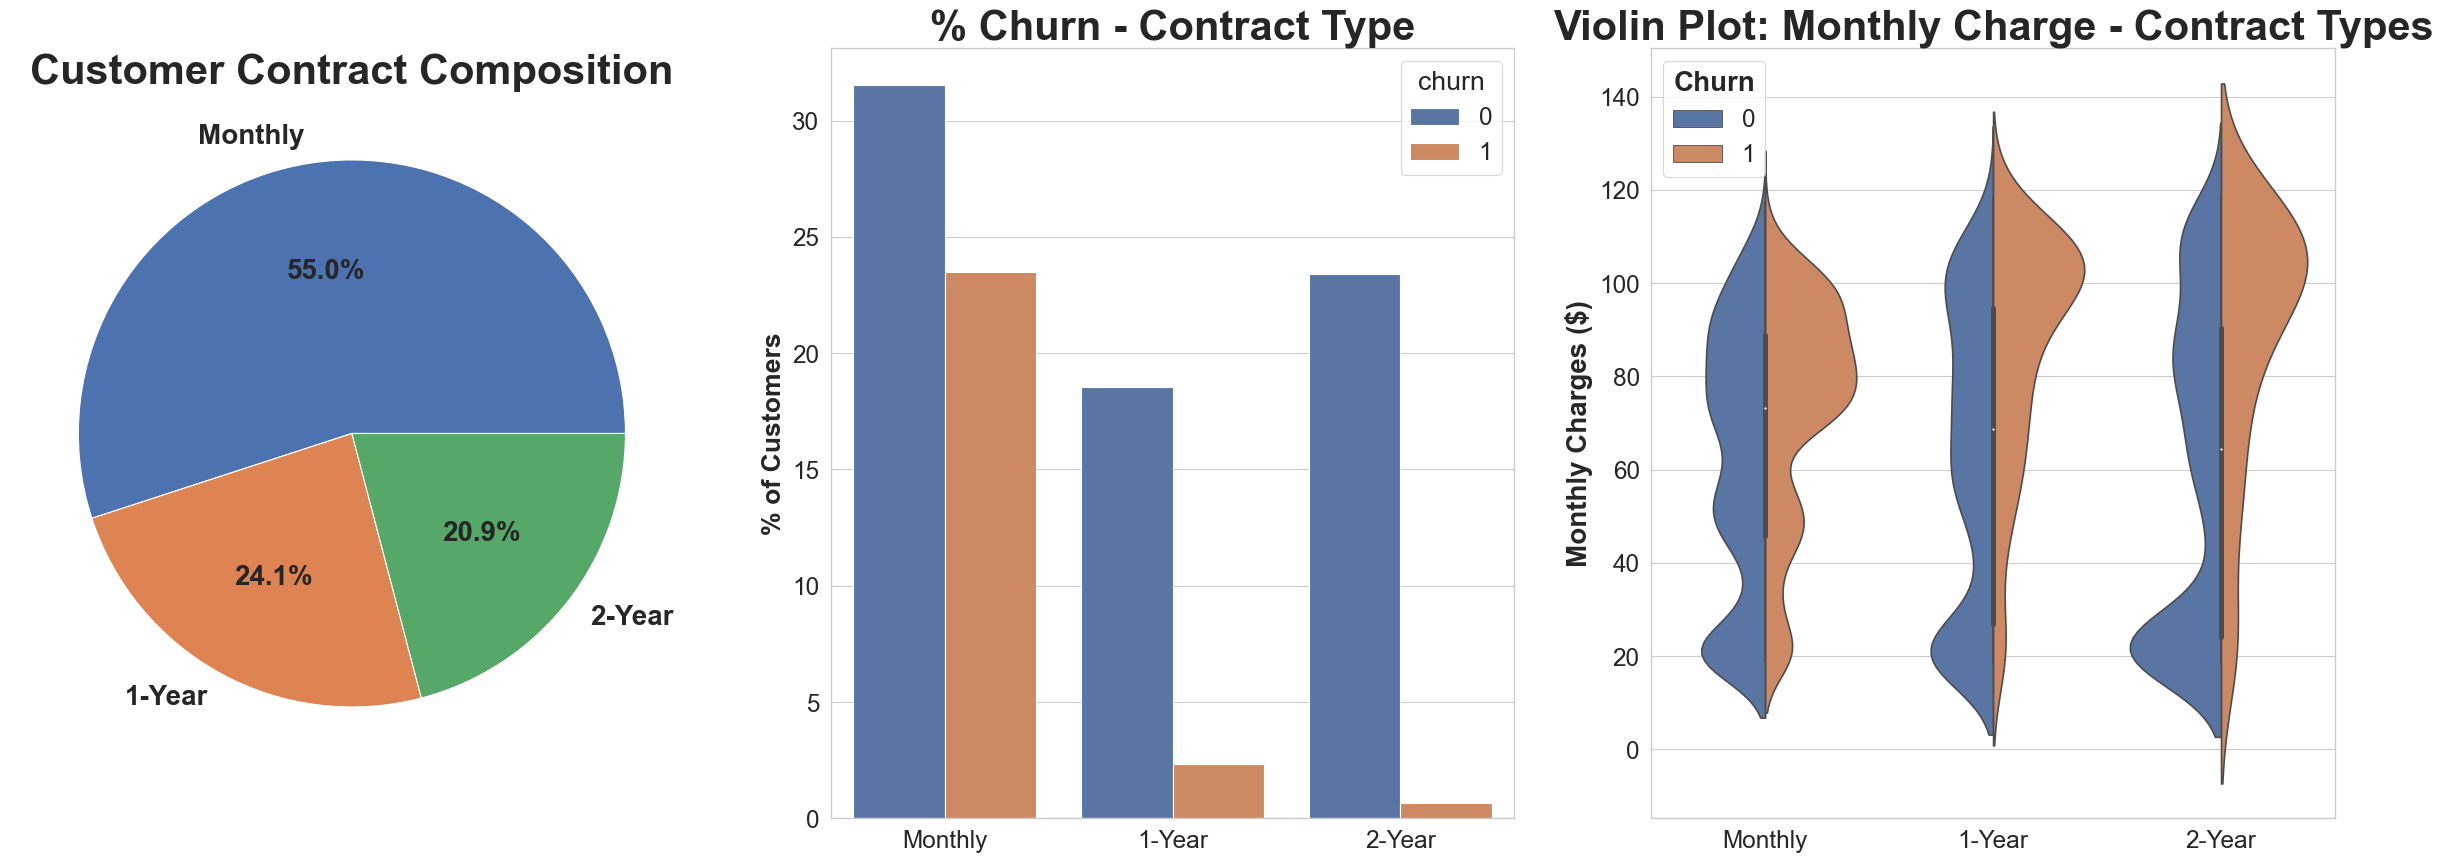

In [46]:
plot_contracts(df)

**Contract Inference:**
- More than half of customers use a monthly payment option
- Significantly more customers churn on monthly plans
- The longer the plan, the lower the churn rate
- Monthly charges are generally higher the longer the contract is

In [47]:
df[['contract','churn']].groupby('contract').mean()

,churn
contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


It seems like, as expected, customers with short-term contract are more likely to churn. This clearly explains the motivation for companies to have long-term relationship with their customers.

In [48]:
pearson = df.corr()
pearson

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
seniorcitizen,1.000000,0.016567,0.220173,0.103006,0.150889
tenure,0.016567,1.000000,0.247900,0.826178,-0.352229
monthlycharges,0.220173,0.247900,1.000000,0.651174,0.193356
totalcharges,0.103006,0.826178,0.651174,1.000000,-0.198324
churn,0.150889,-0.352229,0.193356,-0.198324,1.000000


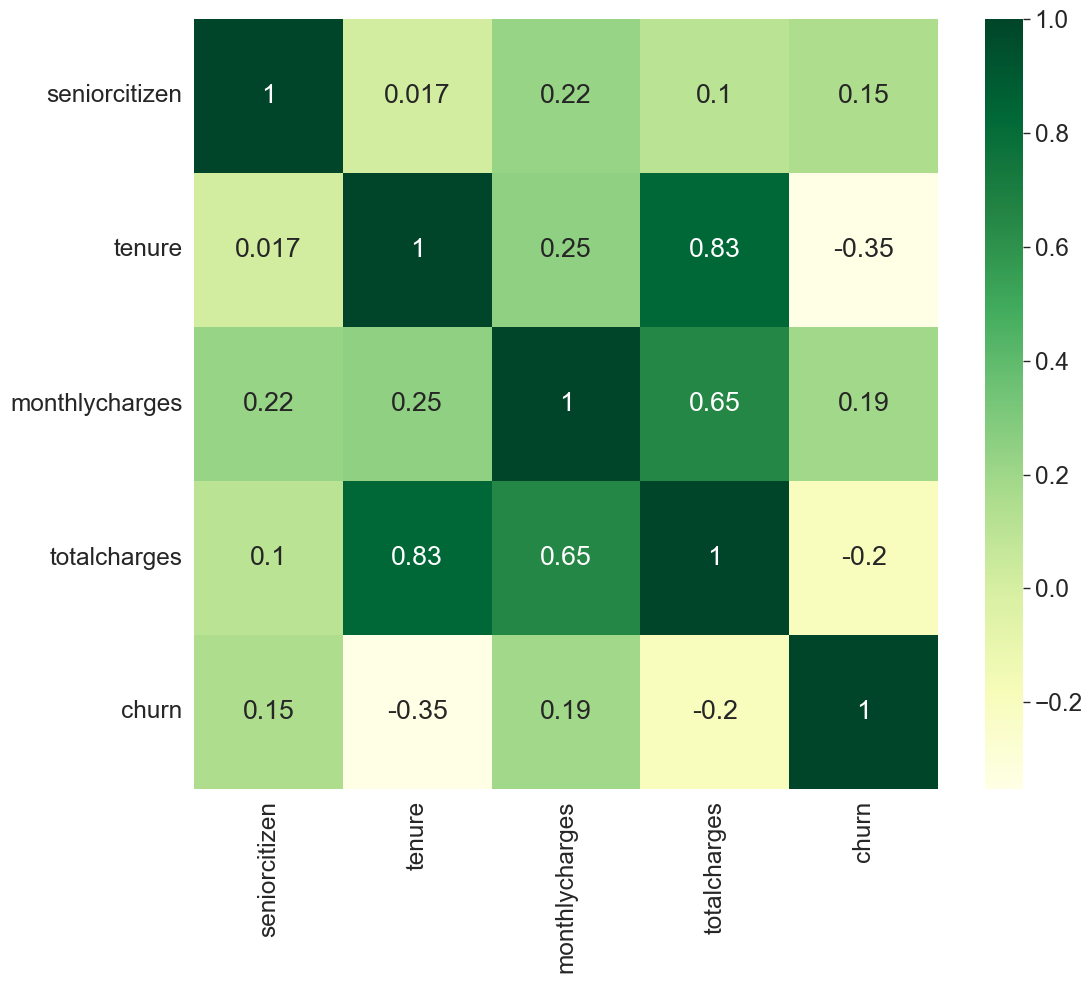

In [49]:
sns.heatmap(pearson , annot=True, cmap="YlGn")
plt.gcf().set_size_inches(12, 10)

Tenure and Total Charge has strong corrolation

In [50]:
#Observe the relationship between the dependence variable and independence variable
df.corrwith(df["churn"]).sort_values(ascending=False)

churn             1.000000
monthlycharges    0.193356
seniorcitizen     0.150889
totalcharges     -0.198324
tenure           -0.352229
dtype: float64

After exploring the variables, I have decided not to use following variable because they add little or no informative power to the model:
CustomerID , Gender , PhoneService, Contract, TotalCharges

In [51]:
df.drop(['customerid','gender','phoneservice','totalcharges','contract'],axis=1,inplace=True)

# Data Preprocessing

In [52]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
#Encode Categorical var 
cat_features = ['seniorcitizen', 'partner', 'dependents',
'multiplelines', 'internetservice','onlinesecurity','onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
'streamingmovies', 'paperlessbilling', 'paymentmethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [ ]:
#Scale continuous variables 
scaler = MinMaxScaler()
X['tenure']= scaler.fit_transform(df[['tenure']])
X['monthlycharges'] = scaler.fit_transform(df[['monthlycharges']])

In [ ]:
X.shape

In [ ]:
X.columns

In [ ]:
#Resampling
sns.countplot('churn', data=df).set_title('Class Distribution Before Resampling')

In [ ]:
df.churn.value_counts()

In [ ]:
#Separating positive class (churn=yes) and negative class (churn=no):
X_no = X[X.churn == 0]
X_yes = X[X.churn == 1]

In [ ]:
#upsampling 

X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))
5174


In [ ]:
#Combining positive and negative class and checking class distribution:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('churn', data=X_upsampled).set_title('Class Distribution After Resampling')


# Model Training

In [ ]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['churn'], axis=1) #features (independent variables)
y = X_upsampled['churn'] #target (dependent variable)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
#Ridge Classifier 
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_forest = RandomForestClassifier(n_estimators = 100,max_depth = 10)
clf_forest.fit(X_train, y_train)